In [458]:
# Import de nos librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anime Data Analysis
Un projet d'analyse sur un jeu de données basé sur l'animation japonaise. Le jeu de données est basé sur les informations du site MyAnimeList, en 2023.

# Présentation du jeu de données

In [459]:
# On importe notre jeu de données
df = pd.read_csv("./data/anime-dataset-2023.csv")

# I. Nettoyage du jeu de données

In [460]:
# TRI DES DONNEES
# Avant de commencer notre analyse, un tri doit être effectué, on retire les animés avec des données non pertinentes : Score non renseigné, ou colonnes qui ne seront pas analysée.
df = df.loc[(df["Score"] != "UNKNOWN") & (df["Type"] != "UNKNOWN")]
df = df.drop(columns=["Producers", "Licensors", "Synopsis", "Image URL"])



In [461]:
# On vérifie qu'il n'y a aucune valeur nulle
df.isnull().sum()

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
dtype: int64

In [462]:
# On supprime les doublons
df = df.drop_duplicates()

# II. Statistiques générales
On commence à manipuler notre jeu de données avec des statistiques très générales qui nous permettent de mieux comprendre notre fichier et son fonctionnement.

In [463]:
# Statistiques générales de notre jeu de données
df[["Score", "Episodes", "Rank", "Popularity", "Favorites", "Scored By", "Members"]].describe()


,Popularity,Favorites,Members
count,15691.000000,15691.000000,1.569100e+04
mean,8207.934039,683.436747,5.832234e+04
std,4909.824413,5468.492656,1.943770e+05
min,1.000000,0.000000,1.800000e+02
25%,3997.000000,1.000000,1.170500e+03
50%,8075.000000,7.000000,4.918000e+03
75%,12155.000000,60.000000,2.690500e+04
max,19191.000000,217606.000000,3.744541e+06


In [464]:
# On jette un œil au nombre unique de valeurs de chaque ligne
df.nunique()

anime_id        15691
Name            15691
English name     7915
Other name      14917
Score             566
Genres            952
Type                6
Episodes          193
Aired           11332
Premiered         234
Status              2
Studios          1353
Source             17
Duration          315
Rating              7
Rank             9685
Popularity      12499
Favorites        1799
Scored By        8280
Members         10564
dtype: int64

On remarque que près de la moitié des animés du jeu de données ne possède pas de nom anglophone, mais très souvent un autre nom (écriture en japonais, ou même titre anglais finalement !)

In [465]:
# On affiche les cinq premières lignes
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Premiered,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001


In [466]:
# On affiche les cinq dernières
df.tail()

,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Premiered,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
24590,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,Lee's Detective Agency: A Day in Lungmen - Hom...,《鲤氏侦探事务所》迷你剧先行短片 - Home Service,5.99,"Action, Comedy, Mystery",ONA,1.0,"Oct 24, 2021",UNKNOWN,Finished Airing,"HMCH, Gravity Well",Game,3 min,PG-13 - Teens 13 or older,8891.0,14796,1,129.0,518
24635,55404,Slash,Slash,slash,6.45,UNKNOWN,Music,1.0,"May 22, 2023",UNKNOWN,Finished Airing,UNKNOWN,Original,4 min,PG-13 - Teens 13 or older,UNKNOWN,16801,1,152.0,333
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,アイドルマスター シンデレラガールズ U149,6.07,UNKNOWN,Special,1.0,"May 25, 2023",UNKNOWN,Finished Airing,CygamesPictures,Web manga,23 min,PG-13 - Teens 13 or older,8521.0,15097,1,114.0,482
24831,55647,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,One Piece: Recapping Fierce Fights! The Counte...,大激戦特集！反撃同盟VSビッグ・マム,6.29,"Action, Adventure, Comedy, Fantasy",Special,1.0,"Jun 18, 2023",UNKNOWN,Finished Airing,UNKNOWN,Manga,24 min,PG-13 - Teens 13 or older,7480.0,14291,1,320.0,593
24856,55676,Fins,Fins,Fins,6.45,UNKNOWN,Music,1.0,"Jun 6, 2023",UNKNOWN,Finished Airing,UNKNOWN,Original,4 min,G - All Ages,UNKNOWN,14842,2,194.0,512


# III. Analyse par Type
On commence notre analyse par une analyse générale de nos types dans notre jeu de données : Anime, Music, ONA, OVA, Movie, Special.

In [467]:
# On compte nos différentes valeurs par type.
df["Type"].value_counts()

Type
TV         4482
OVA        3283
Movie      2475
Special    2039
ONA        1929
Music      1483
Name: count, dtype: int64

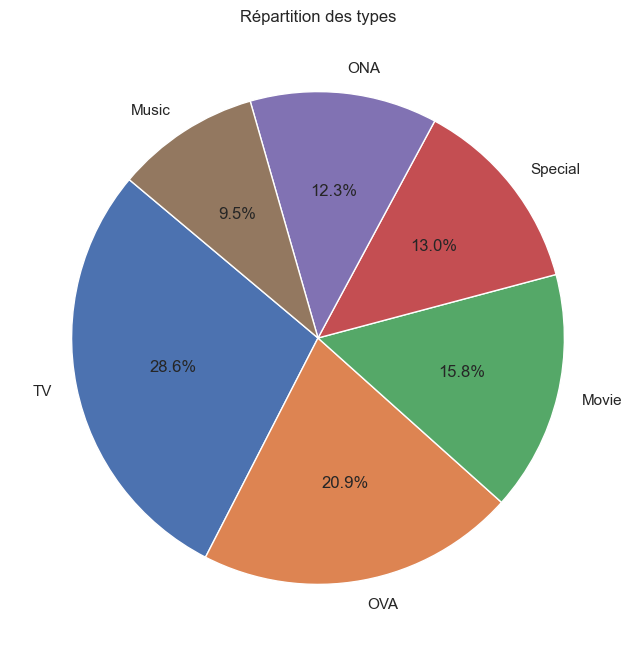

In [468]:
counts = df["Type"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des types")
plt.show()

In [469]:
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")
df= df.dropna(subset=["Score"])

resultMean = df.groupby("Type")["Score"].mean()
resultMax = df.groupby("Type")["Score"].max()


In [470]:
print("Maximal des scores pour chaque type :")
resultMax

Maximal des scores pour chaque type :


Type
Movie      9.04
Music      8.85
ONA        8.72
OVA        9.02
Special    9.05
TV         9.10
Name: Score, dtype: float64

In [471]:
print("Moyenne des scores pour chaque type :")
resultMean

Moyenne des scores pour chaque type :


Type
Movie      6.344137
Music      5.861470
ONA        6.038212
OVA        6.217557
Special    6.365714
TV         6.847144
Name: Score, dtype: float64

## 1. TV
Nous commençons notre analyse détaillée du jeu de données en prenant tout d'abord le Type TV, dans lequel nous analyserons les scores, ou encore la popularité.

Ce que le type TV désigne sont bien sûr les diffusions à travers la télévision, donc principalement des animés.

Un animé désigne l'adaptation d'un manga, d'un light novel (roman), d'un visual novel (jeu), ou une création originale dans un format dessin animé dont un studio d'animation est en charge.
On effectue la nuance avec "dessin animé" (cartoon), qui est associé à l'Occident (Europe, États-Unis), là où un "animé", proviendra donc d'Asie, principalement du Japon, mais aussi de la Corée du Sud et de la Chine.

In [472]:
# On récupère uniquement nos TV du jeu de données
df_anime = df[df["Type"] == "TV"]

,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Premiered,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001
5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23658,53874,Pokemon: Mezase Pokemon Master,UNKNOWN,ポケットモンスター めざせポケモンマスター,7.56,"Action, Adventure, Comedy, Fantasy",TV,11.0,"Jan 13, 2023 to Mar 24, 2023",winter 2023,Finished Airing,OLM,Game,24 min per ep,PG - Children,1517.0,4673,128,7808.0,19087
23659,53876,Pokemon (2023),Pokémon Horizons: The Series,ポケットモンスター(2023),7.52,"Action, Adventure, Comedy, Fantasy",TV,UNKNOWN,"Apr 14, 2023 to ?",spring 2023,Currently Airing,OLM,Game,24 min,PG - Children,1669.0,4602,165,3145.0,19800
23785,54040,Tousouchuu: Great Mission,Run For Money : The Great Mission,逃走中 グレートミッション,5.72,"Sci-Fi, Suspense",TV,UNKNOWN,"Apr 2, 2023 to ?",spring 2023,Currently Airing,Toei Animation,Other,23 min,PG-13 - Teens 13 or older,9989.0,8763,14,439.0,3841
23928,54259,Rokudou no Onna-tachi,Rokudo's Bad Girls,六道の悪女〈おんな〉たち,6.19,"Comedy, Romance",TV,12.0,"Apr 8, 2023 to Jun 24, 2023",spring 2023,Currently Airing,Satelight,Manga,23 min per ep,PG-13 - Teens 13 or older,7922.0,3626,78,6247.0,32829


In [477]:
# --- Données : top 15 par score ---

top15_score = df_anime.sort_values(by="Score", ascending=False).head(15)



,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Premiered,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
3961,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",TV,64.0,"Apr 5, 2009 to Jul 4, 2010",spring 2009,Finished Airing,Bones,Manga,24 min per ep,R - 17+ (violence & profanity),1.0,3,217606,2020030.0,3176556
5667,9253,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense",TV,24.0,"Apr 6, 2011 to Sep 14, 2011",spring 2011,Finished Airing,White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,13,182964,1336233.0,2440369
16617,41467,Bleach: Sennen Kessen-hen,Bleach: Thousand-Year Blood War,BLEACH 千年血戦篇,9.07,"Action, Adventure, Fantasy",TV,13.0,"Oct 11, 2022 to Dec 27, 2022",fall 2022,Finished Airing,Pierrot,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,464,17999,213872.0,445198
9880,28977,Gintama°,Gintama Season 4,銀魂°,9.06,"Action, Comedy, Sci-Fi",TV,51.0,"Apr 8, 2015 to Mar 30, 2016",spring 2015,Finished Airing,Bandai Namco Pictures,Manga,24 min per ep,PG-13 - Teens 13 or older,4.0,331,15947,237957.0,595767
17572,43608,Kaguya-sama wa Kokurasetai: Ultra Romantic,Kaguya-sama: Love is War - Ultra Romantic,かぐや様は告らせたい-ウルトラロマンティック-,9.05,"Comedy, Romance",TV,13.0,"Apr 9, 2022 to Jun 25, 2022",spring 2022,Finished Airing,A-1 Pictures,Manga,23 min per ep,PG-13 - Teens 13 or older,5.0,198,29118,451187.0,820642
14865,38524,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama",TV,10.0,"Apr 29, 2019 to Jul 1, 2019",spring 2019,Finished Airing,Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),6.0,24,55245,1471825.0,2104016
5989,9969,Gintama',Gintama Season 2,銀魂',9.04,"Action, Comedy, Sci-Fi",TV,51.0,"Apr 4, 2011 to Mar 26, 2012",spring 2011,Finished Airing,Sunrise,Manga,24 min per ep,PG-13 - Teens 13 or older,8.0,386,7765,226175.0,525688
6456,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,9.04,"Action, Adventure, Fantasy",TV,148.0,"Oct 2, 2011 to Sep 24, 2014",fall 2011,Finished Airing,Madhouse,Manga,23 min per ep,PG-13 - Teens 13 or older,10.0,10,200265,1651790.0,2656870
7240,15417,Gintama': Enchousen,Gintama: Enchousen,銀魂' 延長戦,9.03,"Action, Comedy, Sci-Fi",TV,13.0,"Oct 4, 2012 to Mar 28, 2013",fall 2012,Finished Airing,Sunrise,Manga,24 min per ep,PG-13 - Teens 13 or older,11.0,715,2967,157644.0,309261
17216,42938,Fruits Basket: The Final,Fruits Basket: The Final Season,フルーツバスケット The Final,9.00,"Drama, Romance, Supernatural",TV,13.0,"Apr 6, 2021 to Jun 29, 2021",spring 2021,Finished Airing,TMS Entertainment,Manga,23 min per ep,PG-13 - Teens 13 or older,13.0,491,18892,211379.0,430967


## 2. Films d'animation

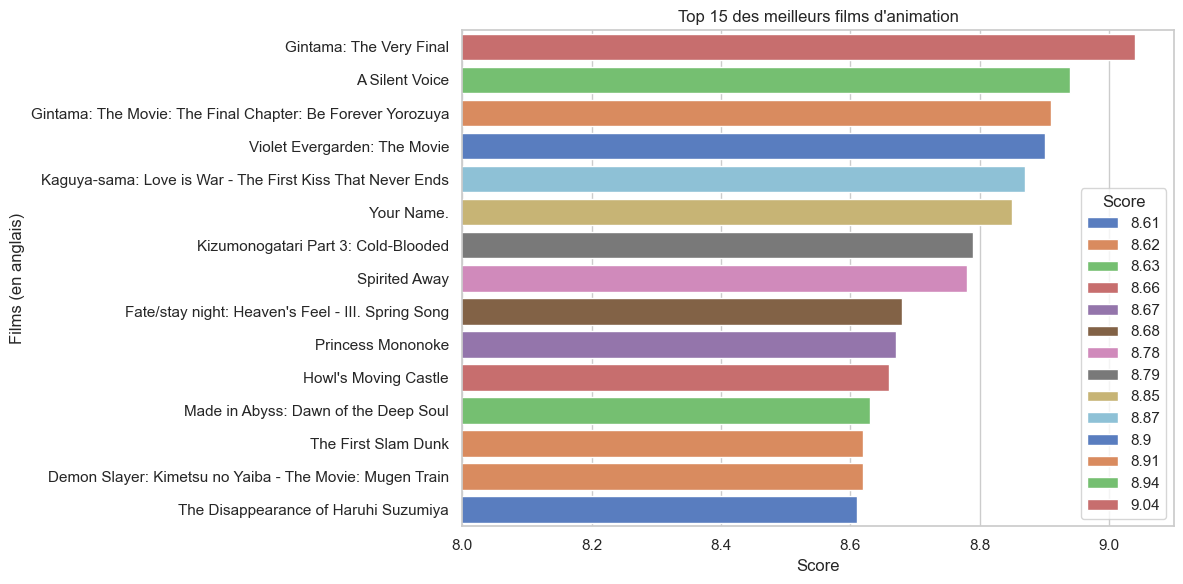

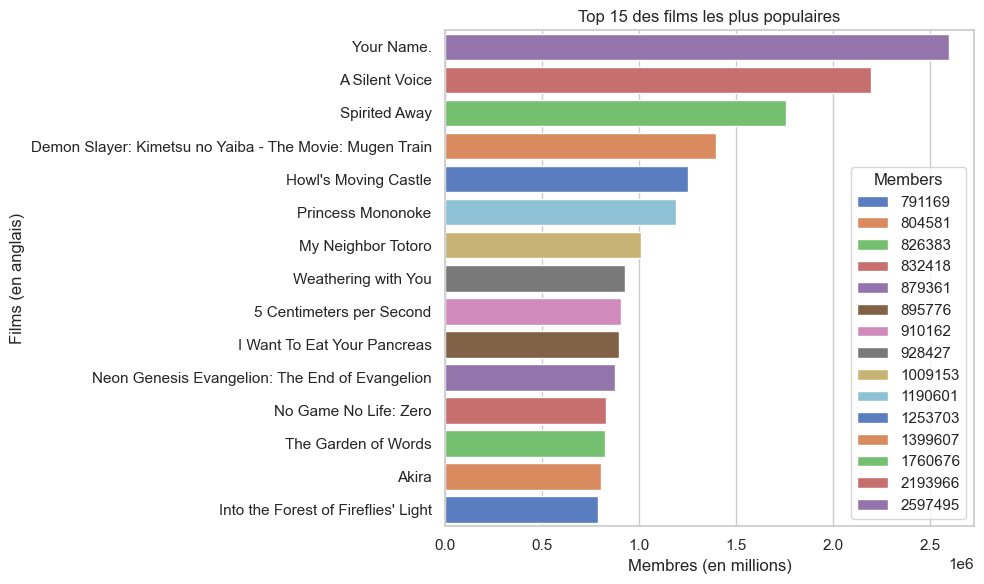

In [473]:
# On récupère uniquement les films
df_movie = df[df["Type"] == "Movie"]

# On ajoute The First Slam Dunk et No Game No Life: Zero, le titre n'étant pas disponible en anglais, et par soucis de lecture nous les afficheront dans cette langue.
df_movie.loc[df_movie["anime_id"] == 45649, "English name"] = "The First Slam Dunk"
df_movie.loc[df_movie["Name"] == "No Game No Life: Zero", "English name"] = "No Game No Life: Zero"


# --- Données : top 15 par score ---

top15_score = df_movie.sort_values(by="Score", ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top15_score,
    y="English name",
    x="Score",
    palette="muted",
    hue="Score",
)

plt.title("Top 15 des meilleurs films d'animation")
plt.xlabel("Score")
plt.ylabel("Films (en anglais)")
plt.xlim(8, 9.1)
plt.tight_layout()
plt.show()


# --- Données : top 15 par popularité (Nombre de membres) ---
top15_pop = df_movie.sort_values(by="Members", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top15_pop,
    y="English name",
    x="Members",
    palette="muted",
    hue="Members",
)

plt.title("Top 15 des films les plus populaires")
plt.xlabel("Membres (en millions)")
plt.ylabel("Films (en anglais)")
plt.tight_layout()
plt.show()




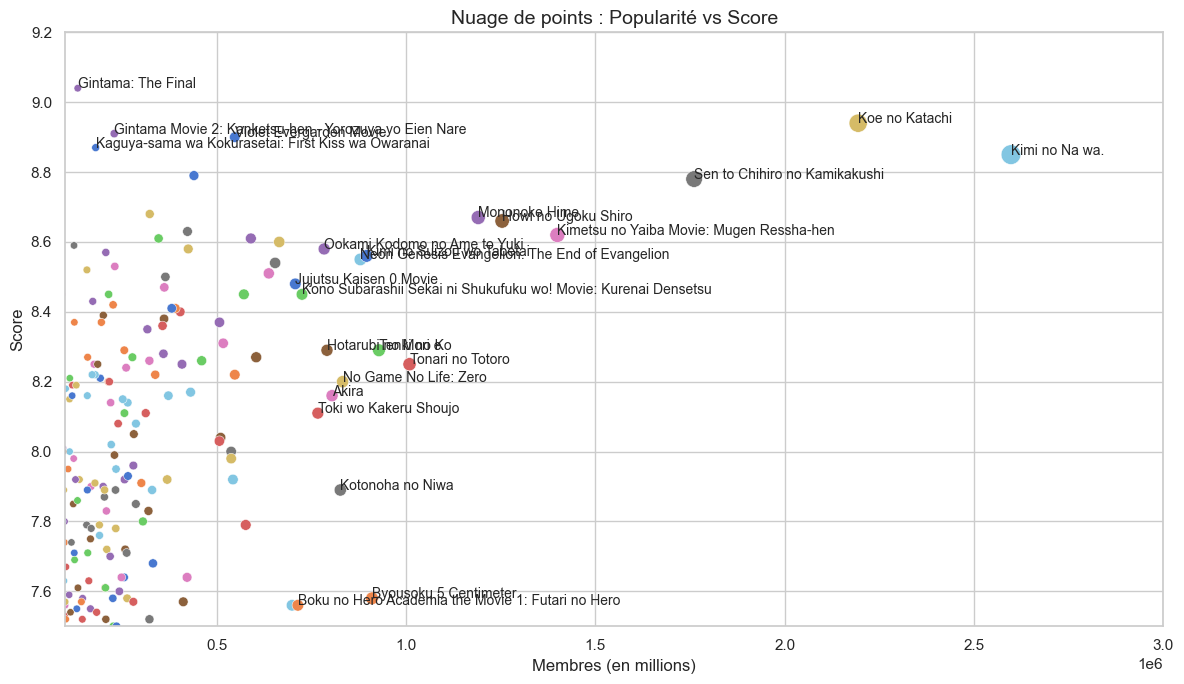

In [474]:
df_movie = df[df["Type"] == "Movie"]

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_movie,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_movie)):
    if (df_movie["Score"].iloc[i] > 8.8) or (df_movie["Members"].iloc[i] > 700000):
        texts.append(
            plt.text(
                x=df_movie["Members"].iloc[i],
                y=df_movie["Score"].iloc[i],
                s=df_movie["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(7.5, 9.2)
plt.xlim(100000, 3000000)
plt.tight_layout()
plt.show()

## 3. OAV

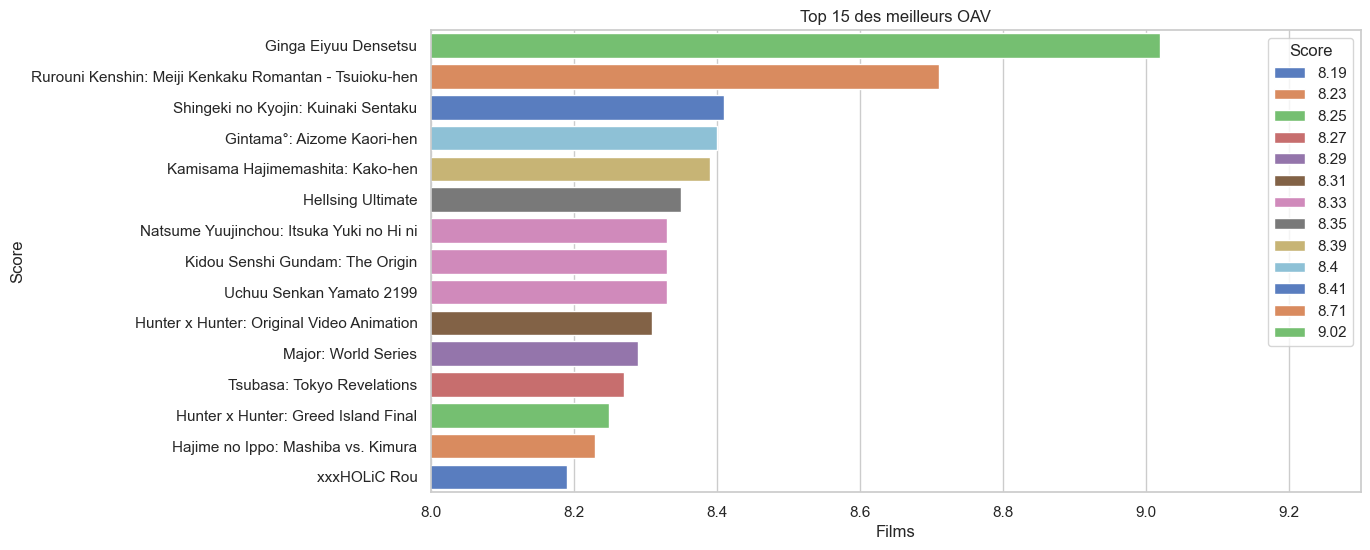

In [475]:
plt.figure(figsize=(12, 6))
df_score = df[df["Type"] == "OVA"]
top15 = df_score.sort_values(by="Score", ascending=False).head(15)
sns.barplot(data=top15, x="Score", y="Name", hue="Score", palette="muted")
plt.title("Top 15 des meilleurs OAV")
plt.xlim(8, 9.3)
plt.ylabel("Score")
plt.xlabel("Films")

plt.show()

## 4. ONA
Un ONA, ou Original Net Anime, est un animé diffusé directement sur Internet, à travers des plateformes de streaming. Il n'est donc pas diffusé à la télévision.
Nous pouvons prendre l'exemple de Netflix qui diffuse JoJo Bizarre Adventure : Stone Ocean, ou Cyberpunk Edgerunners.

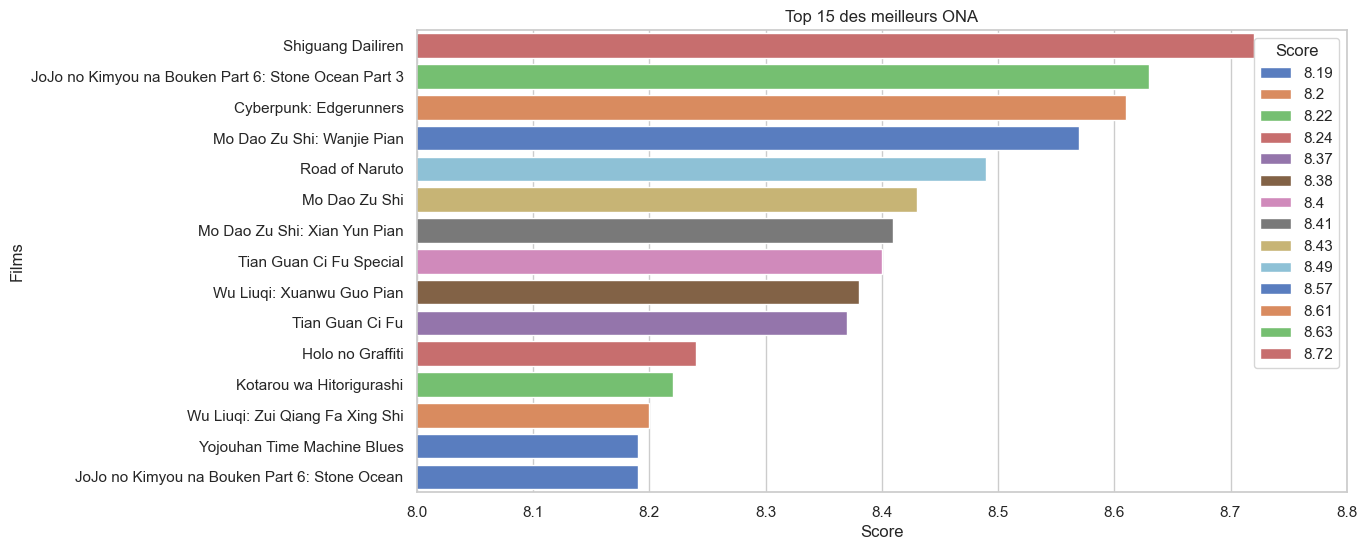

In [476]:
plt.figure(figsize=(12, 6))
df_score = df[df["Type"] == "ONA"]
top15 = df_score.sort_values(by="Score", ascending=False).head(15)
sns.barplot(data=top15, y="Name", x="Score", hue="Score", palette="muted")
plt.title("Top 15 des meilleurs ONA")
plt.xlim(8, 8.8)
plt.xlabel("Score")
plt.ylabel("Films")

plt.show()

# IV. Production
On va s'intéresser dans cette partie aux studios derrière les différents animés de notre jeu de données.